# Modele de regression supervisé

In [1]:
#pip install "pandas=2.2.2"

In [2]:
import pandas as pd

## Chargement des données

In [3]:
df = pd.read_csv('appartements_data.csv')

### Verification du type et de la structure du DataFrame

In [4]:
df.head()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


# Analyse exploratoire des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


In [6]:
df.shape

(1773, 9)

## Verification des duplications

In [7]:
df.duplicated().sum()

np.int64(41)

## Identification des valeurs manquantes

In [8]:
df.isna().any(axis=1).sum()
df.isnull().sum()

title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64

## Analyser la distribution des variables numeriques

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

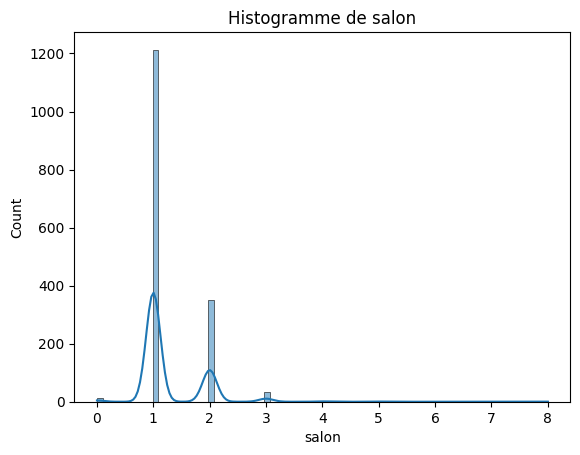

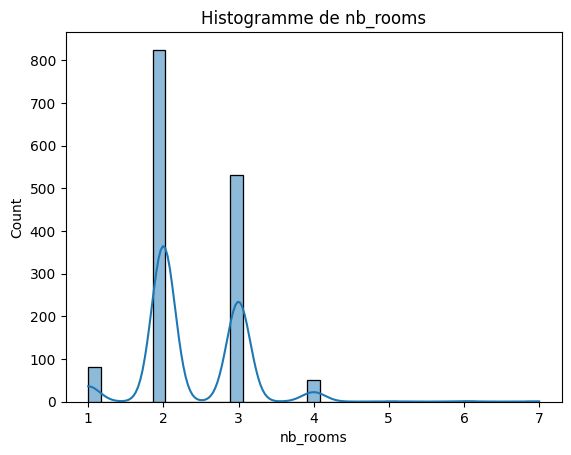

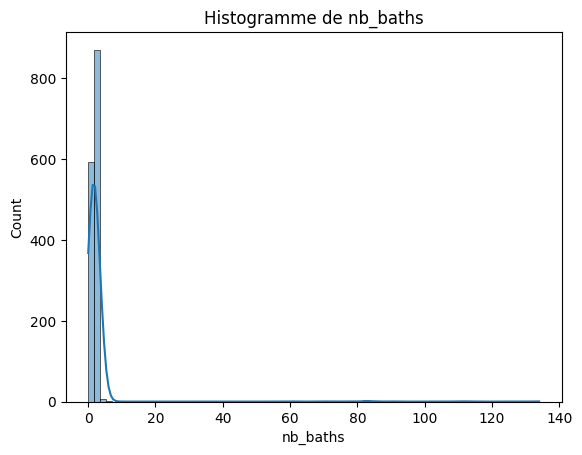

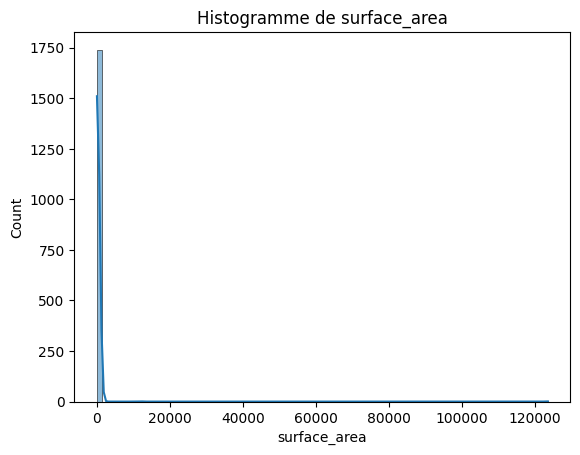

In [11]:
for i in list(df.select_dtypes(include='number').columns):
    sns.histplot(df[i], kde=True)
    plt.title(f'Histogramme de {i}')
    plt.show()

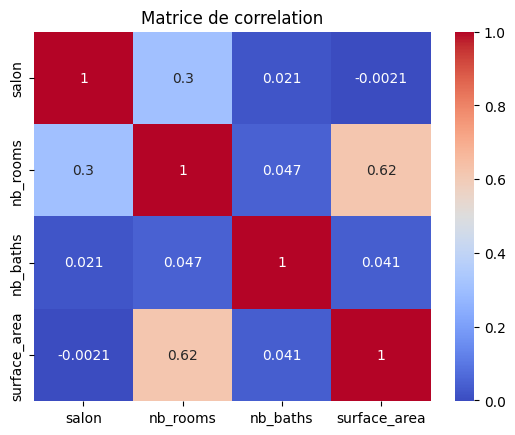

In [12]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True, cmap="coolwarm")
plt.title("Matrice de correlation")
plt.show()

# Prétraitement des données

## Etraction des equipements(equipement) dans les colonnes booléeenne

In [13]:
equipement_dummies = df["equipment"].str.get_dummies(sep='/')
df = pd.concat([df, equipement_dummies], axis=1)

## Convertion de la colonne price en type float et suppression des caractères non numérique

In [14]:
df["price"] = (df["price"].astype(str).str.replace(r'[^\d]',"", regex=True).replace("", None).astype(float))

##  Supprission les colonnes inutiles telles que equipment et link.

In [15]:
df.drop(columns = {"equipment", "link", "title"} , inplace=True)
df.head()

,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,2000000.0,Casablanca,NaN,2.0,2.0,168.0,1,1,0,0,0,0,0,0,1,0,1
1,1195000.0,Casablanca,NaN,2.0,2.0,98.0,1,1,1,1,0,1,0,0,1,0,0
2,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0,1,1,1,1,1,1,1,0,1,1,1
3,900000.0,Casablanca,NaN,1.0,1.0,56.0,1,0,1,1,0,1,0,1,1,1,1
4,3100000.0,Rabat,2.0,3.0,2.0,200.0,1,1,0,0,1,0,0,0,1,1,0


## Traitement de la colonne city_name

In [16]:
df["city_name"].unique()

array(['Casablanca', 'Dar Bouazza', 'Rabat', 'Marrakech', 'Asilah',
       'Bouskoura', 'Kénitra', 'Mohammedia', 'Agadir', 'Tamesna', 'Salé',
       'Had Soualem', 'Temara', 'Benslimane', 'Tanger', 'Bouznika',
       'Meknès', 'Fès', 'El Jadida', 'El Mansouria', 'Martil',
       'الدار البيضاء', 'Fnideq', 'Tétouan', 'Saidia', 'Nouaceur',
       'القنيطرة', 'Tamaris', 'طنجة', 'Cabo Negro',
       'Sidi Allal El Bahraoui', 'Béni Mellal', 'أكادير', nan,
       'Essaouira', 'Mehdia', 'المحمدية', 'Oujda', 'Oued Laou', 'Dcheira',
       'Sidi Rahal', 'Deroua', 'مراكش', 'Ain Attig', 'Safi', 'الرباط',
       'Inzegan', 'Ifrane', 'Dakhla', 'Dcheïra El Jihadia', 'Taghazout',
       'Sidi Bouknadel', 'Skhirat', 'Khouribga', 'Berkane',
       'Mers El Kheir', 'Berrechid', 'Tiznit', 'Agadir Melloul', 'Nador',
       'El Menzeh', 'Bni Ansar', 'Mdiq', 'Tit Mellil', 'Souk El Arbaa',
       'Biougra', 'Settat', 'Ain Aouda', 'Taza', 'Khemisset', 'Oued Zem',
       'Sefrou', 'Merzouga', 'El Hajeb', 'Selo

In [17]:
villes_dict_ar_fr = {
    "الدار البيضاء": "Casablanca",
    "دار بوعزة": "Dar Bouazza",
    "الرباط": "Rabat",
    "مراكش": "Marrakech",
    "أصيلة": "Asilah",
    "بوسكورة": "Bouskoura",
    "القنيطرة": "Kénitra",
    "المحمدية": "Mohammédia",
    "أكادير": "Agadir",
    "تامسنا": "Tamesna",
    "سلا": "Salé",
    "حد السوالم": "Had Soualem",
    "تمارة": "Temara",
    "بنسليمان": "Benslimane",
    "طنجة": "Tanger",
    "بوزنيقة": "Bouznika",
    "مكناس": "Meknès",
    "فاس": "Fès",
    "الجديدة": "El Jadida",
    "المنصورية": "El Mansouria",
    "مرتيل": "Martil",
    "الفنيدق": "Fnideq",
    "تطوان": "Tétouan",
    "السعيدية": "Saidia",
    "النواصر": "Nouaceur",
    "تماريس": "Tamaris",
    "الكابو نيغرو": "Cabo Negro",
    "سيدي علال البحراوي": "Sidi Allal El Bahraoui",
    "بني ملال": "Béni Mellal",
    "الصويرة": "Essaouira",
    "المهدية": "Mehdia",
    "وجدة": "Oujda",
    "واد لاو": "Oued Laou",
    "الدشيرة": "Dcheira",
    "سيدي رحال": "Sidi Rahal",
    "الدروا": "Deroua",
    "عين عتيق": "Ain Attig",
    "آسفي": "Safi",
    "إنزكان": "Inzegan",
    "إفران": "Ifrane",
    "الداخلة": "Dakhla",
    "الدشيرة الجهادية": "Dcheïra El Jihadia",
    "تغازوت": "Taghazout",
    "سيدي بوقنادل": "Sidi Bouknadel",
    "الصخيرات": "Skhirat",
    "خريبكة": "Khouribga",
    "بركان": "Berkane",
    "مرسى الخير": "Mers El Kheir",
    "برشيد": "Berrechid",
    "تزنيت": "Tiznit",
    "أكادير ملول": "Agadir Melloul",
    "الناظور": "Nador",
    "المنزه": "El Menzé",
    "بني أنصار": "Bni Ansar",
    "المضيق": "Mdiq",
    "تيت مليل": "Tit Mellil",
    "سوق الأربع": "Souk El Arbaa",
    "بيوجرا": "Biougra",
    "سطات": "Settat",
    "عين عودة": "Ain Aouda",
    "تازة": "Taza",
    "الخميسات": "Khemisset",
    "واد زم": "Oued Zem",
    "صفرو": "Sefrou",
    "مرزوكة": "Merzouga",
    "الحاجب": "El Hajeb",
    "سلوان": "Selouane",
    "تاونات": "Taounate",
    "سيدي بنور": "Sidi Bennour",
    "القسيبة": "El Ksiba"
}
df["city_name"] = df["city_name"].str.strip().map(villes_dict_ar_fr).fillna(df["city_name"])

In [18]:
df["city_name"].unique()

array(['Casablanca', 'Dar Bouazza', 'Rabat', 'Marrakech', 'Asilah',
       'Bouskoura', 'Kénitra', 'Mohammedia', 'Agadir', 'Tamesna', 'Salé',
       'Had Soualem', 'Temara', 'Benslimane', 'Tanger', 'Bouznika',
       'Meknès', 'Fès', 'El Jadida', 'El Mansouria', 'Martil', 'Fnideq',
       'Tétouan', 'Saidia', 'Nouaceur', 'Tamaris', 'Cabo Negro',
       'Sidi Allal El Bahraoui', 'Béni Mellal', nan, 'Essaouira',
       'Mehdia', 'Mohammédia', 'Oujda', 'Oued Laou', 'Dcheira',
       'Sidi Rahal', 'Deroua', 'Ain Attig', 'Safi', 'Inzegan', 'Ifrane',
       'Dakhla', 'Dcheïra El Jihadia', 'Taghazout', 'Sidi Bouknadel',
       'Skhirat', 'Khouribga', 'Berkane', 'Mers El Kheir', 'Berrechid',
       'Tiznit', 'Agadir Melloul', 'Nador', 'El Menzeh', 'Bni Ansar',
       'Mdiq', 'Tit Mellil', 'Souk El Arbaa', 'Biougra', 'Settat',
       'Ain Aouda', 'Taza', 'Khemisset', 'Oued Zem', 'Sefrou', 'Merzouga',
       'El Hajeb', 'Selouane', 'Taounate', 'Sidi Bennour', 'El Ksiba'],
      dtype=object)

## Remplacement des valeurs manquantes dans city_name par "Unknown".

In [19]:
if df["city_name"].isna().any(axis=0).sum() > 0:
    df["city_name"] = df["city_name"].fillna("Unknown")
df.isnull().sum()

price              283
city_name            0
salon              153
nb_rooms           283
nb_baths           293
surface_area        31
Ascenseur            0
Balcon               0
Chauffage            0
Climatisation        0
Concierge            0
Cuisine Équipée      0
Duplex               0
Meublé               0
Parking              0
Sécurité             0
Terrasse             0
dtype: int64

## Gestion des valeurs manquantes:

## Remplacement les valeurs manquantes par la médiane.

In [20]:
for i in list(df.select_dtypes(include="number").columns):
    df[i] = df[i].fillna(df[i].median())

In [21]:
df.isnull().sum()

price              0
city_name          0
salon              0
nb_rooms           0
nb_baths           0
surface_area       0
Ascenseur          0
Balcon             0
Chauffage          0
Climatisation      0
Concierge          0
Cuisine Équipée    0
Duplex             0
Meublé             0
Parking            0
Sécurité           0
Terrasse           0
dtype: int64

## Pour les colonnes catégorielles (chaînes de caractères) : imputer avec "Unknown"

In [22]:
for i in df.select_dtypes(include="object").columns:
    df[i] = df[i].fillna("Unkown")

# Détection et suppression des valeurs aberrantes:

## Détection les outliers avec la methode statistique IQR

In [23]:
def outliers(dframe):
    outlier_ = {}
    for i in list(dframe.select_dtypes(include="number").columns):
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        IQR = q1 - q3
        b_basse = q1 - 1.5*IQR
        b_haute = q3 + 1.5*IQR
        outliers = dframe[(dframe[i] < b_basse) | (dframe[i] > b_haute)]

    if not outliers.empty:
        outlier_ = outliers
    return outlier_
 
outliers(df)

,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,2000000.0,Casablanca,1.0,2.0,2.0,168.0,1,1,0,0,0,0,0,0,1,0,1
1,1195000.0,Casablanca,1.0,2.0,2.0,98.0,1,1,1,1,0,1,0,0,1,0,0
2,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0,1,1,1,1,1,1,1,0,1,1,1
3,900000.0,Casablanca,1.0,1.0,1.0,56.0,1,0,1,1,0,1,0,1,1,1,1
4,3100000.0,Rabat,2.0,3.0,2.0,200.0,1,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,880000.0,Agadir,1.0,2.0,2.0,62.0,1,1,0,0,0,1,0,0,1,1,0
1769,880000.0,Agadir,2.0,2.0,2.0,110.0,1,0,0,0,0,0,0,0,1,0,0
1770,880000.0,Temara,2.0,2.0,2.0,12000.0,1,1,0,0,0,0,0,0,1,1,0
1771,700000.0,Casablanca,1.0,2.0,2.0,84.0,0,0,0,0,0,1,0,0,1,1,0


## Suppression des lignes contenant des valeurs aberrantes sur des colonnes clés

In [24]:
def drop_outliers(dframe):
    outlier_ = {}
    for i in list(dframe.select_dtypes(include="number").columns):
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        IQR = q1 - q3
        b_basse = q1 - 1.5*IQR
        b_haute = q3 + 1.5*IQR
        outliers = dframe[(dframe[i] >= b_basse) | (dframe[i] <= b_haute)]

    if not outliers.empty:
        outlier_ = outliers
    return outlier_


outliers(df)


,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,2000000.0,Casablanca,1.0,2.0,2.0,168.0,1,1,0,0,0,0,0,0,1,0,1
1,1195000.0,Casablanca,1.0,2.0,2.0,98.0,1,1,1,1,0,1,0,0,1,0,0
2,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0,1,1,1,1,1,1,1,0,1,1,1
3,900000.0,Casablanca,1.0,1.0,1.0,56.0,1,0,1,1,0,1,0,1,1,1,1
4,3100000.0,Rabat,2.0,3.0,2.0,200.0,1,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,880000.0,Agadir,1.0,2.0,2.0,62.0,1,1,0,0,0,1,0,0,1,1,0
1769,880000.0,Agadir,2.0,2.0,2.0,110.0,1,0,0,0,0,0,0,0,1,0,0
1770,880000.0,Temara,2.0,2.0,2.0,12000.0,1,1,0,0,0,0,0,0,1,1,0
1771,700000.0,Casablanca,1.0,2.0,2.0,84.0,0,0,0,0,0,1,0,0,1,1,0


In [25]:
df.head()

,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,2000000.0,Casablanca,1.0,2.0,2.0,168.0,1,1,0,0,0,0,0,0,1,0,1
1,1195000.0,Casablanca,1.0,2.0,2.0,98.0,1,1,1,1,0,1,0,0,1,0,0
2,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0,1,1,1,1,1,1,1,0,1,1,1
3,900000.0,Casablanca,1.0,1.0,1.0,56.0,1,0,1,1,0,1,0,1,1,1,1
4,3100000.0,Rabat,2.0,3.0,2.0,200.0,1,1,0,0,1,0,0,0,1,1,0


## Encodage des variables catégorielles

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["city_name_encoder"] = le.fit_transform(df["city_name"])

In [ ]:
df.head()

,price,city_name,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse,city_name_encoder
0,2000000.0,Casablanca,1.0,2.0,2.0,168.0,1,1,0,0,0,0,0,0,1,0,1,14
1,1195000.0,Casablanca,1.0,2.0,2.0,98.0,1,1,1,1,0,1,0,0,1,0,0,14
2,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0,1,1,1,1,1,1,1,0,1,1,1,16
3,900000.0,Casablanca,1.0,1.0,1.0,56.0,1,0,1,1,0,1,0,1,1,1,1,14
4,3100000.0,Rabat,2.0,3.0,2.0,200.0,1,1,0,0,1,0,0,0,1,1,0,48


## Mise à l’échelle des variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

column_number = df.select_dtypes(include="number").columns
df_numerique = df[column_number]
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_numerique), columns=column_number)

## Sélection des variables explicatives

In [ ]:
corr = df.corr(numeric_only=True)
df.head()
corr_with_price = corr["price"].drop("price")
corr_features = corr_with_price[corr_with_price.abs() > 0.15]
print("Les variables numériques corrélées à 'price'( > 0.15) sont: ", corr_features)
df = df[corr_features.index.tolist() + ["price"]]
df.head()

Les variables numériques corrélées à 'price'( > 0.15) sont:  salon            0.171269
nb_rooms         0.274253
Ascenseur        0.177907
Chauffage        0.161472
Climatisation    0.169591
Parking          0.168089
Terrasse         0.157132
Name: price, dtype: float64


,salon,nb_rooms,Ascenseur,Chauffage,Climatisation,Parking,Terrasse,price
0,0.125,0.166667,1.0,0.0,0.0,1.0,1.0,0.083332
1,0.125,0.166667,1.0,1.0,1.0,1.0,0.0,0.049790
2,0.125,0.166667,1.0,1.0,1.0,1.0,1.0,0.056249
3,0.125,0.000000,1.0,1.0,1.0,1.0,1.0,0.037499
4,0.250,0.333333,1.0,0.0,0.0,1.0,0.0,0.129165


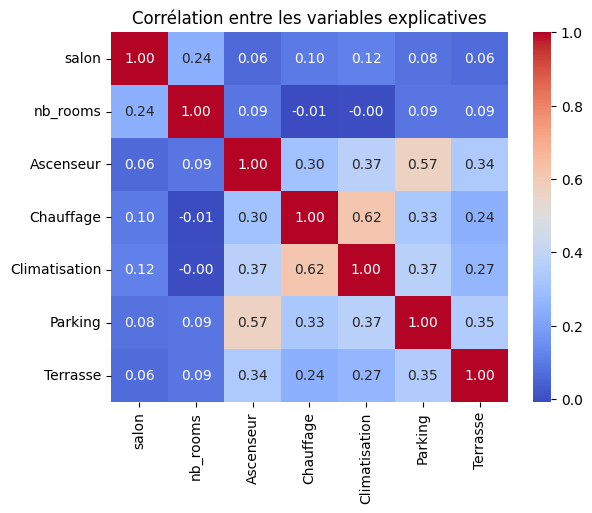

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[corr_features.index.tolist()].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables explicatives")
plt.show()

## Séparation des données

In [ ]:
from sklearn.model_selection import train_test_split
Y = df["price"]
X = df.drop("price", axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Entraînement des modèles de régression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
#Entraîner un modèle de régression linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
# Évaluer les modèles à l’aide de RMSE, R² et MAE
y_pred_lr = lr_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred_lr)
#rmse_lr = mean_squared_error(Y_test, y_pred_lr, squared=False)
r2_lr = r2_score(Y_test, y_pred_lr)
print("Régression linéaire - RMSE:", rmse_lr, "R²:", r2_lr, "MSE", mse)

Régression linéaire - RMSE: 0.04322270057246358 R²: 0.08557130334924312 MSE 0.0018682018447768436


In [ ]:
#Entraîner un modèle de Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
# Évaluer les modèles à l’aide de RMSE, R² et MAE
y_pred_rf = rf_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
print("Random Forest - RMSE:", rmse_rf, "R²:", r2_rf, "MSE", mse)

Random Forest - RMSE: 0.04258244278546568 R²: 0.11246151623543243 MSE 0.0018132644335774578


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
# Standardusation 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Entraîner un modèle SVR
svr_model = SVR(kernel = "rbf")
svr_model.fit(X_train_scaled, Y_train)
# Évaluer les modèles à l’aide de RMSE, R² et MAE
y_pred_svr = svr_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, y_pred_svr)
rmse_svr = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred_svr)
r2_svr = r2_score(Y_test, y_pred_svr)
print("SVR - RMSE: ", rmse_svr, "R²: ", r2_svr, "MSE", mse)

SVR - RMSE:  0.07244837510845484 R²:  -1.5691138413807626 MSE 0.005248767055855378


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Entrainer un gradient boosting regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, Y_train)
# Évaluer les modèles à l’aide de RMSE, R² et MAE
y_pred_gbr = gbr_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred_gbr)
r2_gbr = r2_score(Y_test, y_pred_gbr)
print("Gradient Boosting Regressor - RMSE: ", rmse_gbr, "R²", r2_gbr, "MSE", mse)

Gradient Boosting Regressor - RMSE:  0.04312697392817901 R² 0.08961724476291932 MSE 0.0018599358802018323


### Tableau comparatifs des models

In [ ]:
result = pd.DataFrame({
    'model':["Linear Regression", "Randorm Forest", "SVR", "Gradient Boosting"],
    "RMSE":[rmse_lr, rmse_rf, rmse_svr, rmse_gbr],
    "R²": [r2_lr, r2_rf, r2_svr, r2_gbr]
})
print(result)

               model      RMSE        R²
0  Linear Regression  0.043223  0.085571
1     Randorm Forest  0.042582  0.112462
2                SVR  0.072448 -1.569114
3  Gradient Boosting  0.043127  0.089617


## La validation croisée (cross-validation)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
models = {
    "linearRegression": LinearRegression(),
    "randomForest": RandomForestRegressor(random_state=42),
    "gradientBoosting": GradientBoostingRegressor(random_state=42),
    "svr": SVR()
}

for name, model in models.items():
    rmse_scorer = make_scorer(mean_squared_error)
    if name == "svr":
        svr_pipeline = make_pipeline(StandardScaler(), model)
        scores = cross_val_score(svr_pipeline, X, Y, cv=5, scoring=rmse_scorer)
        print(f"{name} Moyenne RMSE = {np.mean(scores):.2f}, Ecart-Type = {np.std(scores):.2f}")
    else:
        scores = cross_val_score(model, X, Y, cv=5, scoring=rmse_scorer)
        print(f"{name}: Moyenne RMSE = {np.mean(scores):.2f}, Ecart-Type = {np.std(scores):.2f}")
        

linearRegression: Moyenne RMSE = 0.00, Ecart-Type = 0.00
randomForest: Moyenne RMSE = 0.00, Ecart-Type = 0.00
gradientBoosting: Moyenne RMSE = 0.00, Ecart-Type = 0.00
svr Moyenne RMSE = 0.01, Ecart-Type = 0.00


# Optimisation des hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Dictionnaire des modèles + grilles d'hyperparamètres
models_params = {
    'RandomForest': (
        RandomForestRegressor(random_state=42),
        {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
    ),
    'GradientBoosting': (
        GradientBoostingRegressor(random_state=42),
        {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
    ),
    'DecisionTree': (
        DecisionTreeRegressor(random_state=42),
        {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
    ),
    'SVR': (
        SVR(),
        {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    )
}

results = {}

# Fonction d’évaluation 
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from numpy import sqrt
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    print(f"{name} — R²: {r2:.4f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")
    return {'r2': r2, 'rmse': rmse, 'mae': mae}

# Boucle automatique sur tous les modèles
for name, (model, param_grid) in models_params.items():
    print(f"GridSearchCV pour {name}...")
    grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, Y_train)
    best_model = grid.best_estimator_
    print(f"Meilleurs hyperparamètres pour {name}: {grid.best_params_}")
    results[f'{name}_Optimized'] = evaluate_model(f'{name} Optimized', best_model, X_train, Y_train, X_test, Y_test)


GridSearchCV pour RandomForest...
Meilleurs hyperparamètres pour RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
RandomForest Optimized — R²: 0.1056 | RMSE: 0.04 | MAE: 0.02
GridSearchCV pour GradientBoosting...
Meilleurs hyperparamètres pour GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
GradientBoosting Optimized — R²: 0.0947 | RMSE: 0.04 | MAE: 0.02
GridSearchCV pour DecisionTree...
Meilleurs hyperparamètres pour DecisionTree: {'max_depth': None, 'min_samples_split': 10}
DecisionTree Optimized — R²: 0.0949 | RMSE: 0.04 | MAE: 0.02
GridSearchCV pour SVR...
Meilleurs hyperparamètres pour SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVR Optimized — R²: -1.2552 | RMSE: 0.07 | MAE: 0.06


## Selection du meilleur modele

import joblib

# Trouver le meilleur modèle basé sur le R²
best_model_name = max(results, key=lambda k: results[k]['r2'])
best_score = results[best_model_name]['r2']

print(f"\n Meilleur modèle selon R² sur le test set : {best_model_name} avec un R² de {best_score:.4f}")

joblib.dump(best_model_name, 'model.pkl')
print("Modèle sauvegardé sous model.pkl")